In [1]:
import pandas as pd
import pandas_datareader.data as web

import datetime

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 80)
pd.set_option("precision", 3)

In [5]:
start = datetime.date(2017, 9, 1)
end = datetime.date(2020, 8, 30)

In [6]:
def get(tickers, start, end):
    
    def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
    
    stocks = map(data, tickers)
    
    return pd.concat(stocks, keys = tickers, names = ["Ticker", "Date"])

>Get data for stocks of following companies:

- Pepsi (PEP)
- Cocacola (KO)
- Starbucks (SBUX)
- McDonald (MCD)
- YUM,Yum!Brands (YUM)
- Campbell Soup (CPB)


In [7]:
tickers = ["PEP", "KO", "SBUX", "MCD", "YUM","CPB"]

In [8]:
stock6 = get(tickers, start, end)
stock6

                     High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
PEP    2017-08-31  115.84  114.93  115.24  115.73  4.710e+06    104.143
       2017-09-01  116.09  115.15  115.38  115.84  2.592e+06    104.242
       2017-09-05  116.06  115.41  115.95  115.87  2.711e+06    104.269
       2017-09-06  116.47  115.64  116.17  116.35  2.618e+06    104.701
       2017-09-07  117.29  116.39  116.65  116.99  2.624e+06    105.277
...                   ...     ...     ...     ...        ...        ...
CPB    2020-08-24   53.10   52.15   52.75   52.69  1.511e+06     51.906
       2020-08-25   53.18   52.54   53.00   53.03  1.360e+06     52.241
       2020-08-26   53.50   52.39   52.90   53.48  1.375e+06     52.685
       2020-08-27   54.08   53.26   53.51   53.29  1.432e+06     52.497
       2020-08-28   53.29   51.93   53.29   52.14  1.827e+06     51.365

[4524 rows x 6 columns]

In [9]:
daily_close_px = stock6[["Adj Close"]].reset_index().pivot("Date", "Ticker", "Adj Close")

In [10]:
daily_close_px

Ticker         CPB      KO      MCD      PEP    SBUX     YUM
Date                                                        
2017-08-31  41.267  40.269  146.850  104.143  51.076  72.235
2017-09-01  40.552  40.473  146.703  104.242  51.141  72.056
2017-09-05  41.686  40.596  146.051  104.269  51.328  71.765
2017-09-06  42.454  40.632  145.243  104.701  50.564  71.661
2017-09-07  42.329  40.915  146.785  105.277  49.782  71.906
...            ...     ...      ...      ...     ...     ...
2020-08-24  51.906  46.825  208.849  134.616  77.979  95.204
2020-08-25  52.241  46.766  208.879  134.283  81.983  95.590
2020-08-26  52.685  47.010  209.969  135.428  81.676  94.451
2020-08-27  52.497  47.079  208.427  135.359  82.667  94.589
2020-08-28  51.365  48.640  211.099  136.865  84.242  96.551

[754 rows x 6 columns]

In [11]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.iloc[:,].head()

Ticker        CPB         KO    MCD        PEP   SBUX    YUM
Date                                                        
2017-08-31    NaN        NaN    NaN        NaN    NaN    NaN
2017-09-01 -0.017  5.049e-03 -0.001  9.506e-04  0.001 -0.002
2017-09-05  0.028  3.058e-03 -0.004  2.589e-04  0.004 -0.004
2017-09-06  0.018  8.709e-04 -0.006  4.143e-03 -0.015 -0.001
2017-09-07 -0.003  6.963e-03  0.011  5.501e-03 -0.015  0.003

In [12]:
daily_pct_change.fillna(0, inplace = True)
daily_pct_change.iloc[:,:]

Ticker        CPB         KO        MCD        PEP   SBUX    YUM
Date                                                            
2017-08-31  0.000  0.000e+00  0.000e+00  0.000e+00  0.000  0.000
2017-09-01 -0.017  5.049e-03 -1.000e-03  9.506e-04  0.001 -0.002
2017-09-05  0.028  3.058e-03 -4.443e-03  2.589e-04  0.004 -0.004
2017-09-06  0.018  8.709e-04 -5.531e-03  4.143e-03 -0.015 -0.001
2017-09-07 -0.003  6.963e-03  1.062e-02  5.501e-03 -0.015  0.003
...           ...        ...        ...        ...    ...    ...
2020-08-24  0.003  1.459e-02  4.963e-03  8.647e-03  0.021  0.005
2020-08-25  0.006 -1.251e-03  1.411e-04 -2.470e-03  0.051  0.004
2020-08-26  0.008  5.218e-03  5.220e-03  8.521e-03 -0.004 -0.012
2020-08-27 -0.004  1.453e-03 -7.345e-03 -5.057e-04  0.012  0.001
2020-08-28 -0.022  3.317e-02  1.282e-02  1.113e-02  0.019  0.021

[754 rows x 6 columns]

In [13]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.iloc[:,].head()

Ticker        CPB     KO    MCD    PEP   SBUX    YUM
Date                                                
2017-08-31  1.000  1.000  1.000  1.000  1.000  1.000
2017-09-01  0.983  1.005  0.999  1.001  1.001  0.998
2017-09-05  1.010  1.008  0.995  1.001  1.005  0.993
2017-09-06  1.029  1.009  0.989  1.005  0.990  0.992
2017-09-07  1.026  1.016  1.000  1.011  0.975  0.995

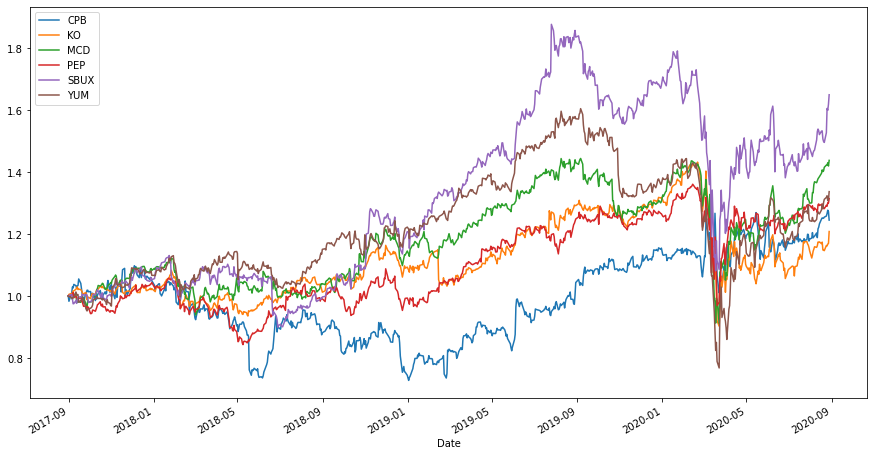

In [14]:
cum_daily_return.plot(figsize = (15,8))
plt.legend(loc = "upper left")

In [15]:
daily_pct_change

Ticker        CPB         KO        MCD        PEP   SBUX    YUM
Date                                                            
2017-08-31  0.000  0.000e+00  0.000e+00  0.000e+00  0.000  0.000
2017-09-01 -0.017  5.049e-03 -1.000e-03  9.506e-04  0.001 -0.002
2017-09-05  0.028  3.058e-03 -4.443e-03  2.589e-04  0.004 -0.004
2017-09-06  0.018  8.709e-04 -5.531e-03  4.143e-03 -0.015 -0.001
2017-09-07 -0.003  6.963e-03  1.062e-02  5.501e-03 -0.015  0.003
...           ...        ...        ...        ...    ...    ...
2020-08-24  0.003  1.459e-02  4.963e-03  8.647e-03  0.021  0.005
2020-08-25  0.006 -1.251e-03  1.411e-04 -2.470e-03  0.051  0.004
2020-08-26  0.008  5.218e-03  5.220e-03  8.521e-03 -0.004 -0.012
2020-08-27 -0.004  1.453e-03 -7.345e-03 -5.057e-04  0.012  0.001
2020-08-28 -0.022  3.317e-02  1.282e-02  1.113e-02  0.019  0.021

[754 rows x 6 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc56b79fee0>,
      dtype=object)

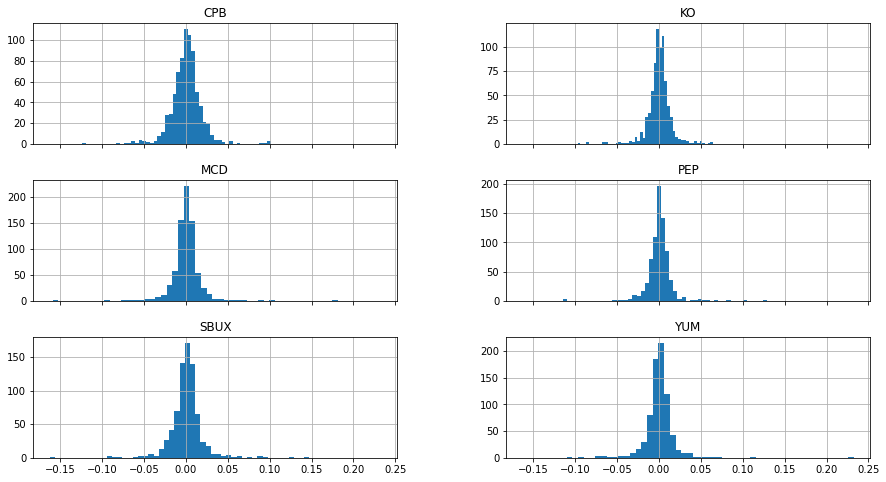

In [16]:
daily_pct_change.hist(bins = 50, sharex = True, figsize = (15, 8))

### QQ-Plots

In [17]:
import scipy.stats as stats

In [18]:
tickers = ["PEP", "KO", "SBUX", "MCD", "YUM","CPB"]

In [19]:
daily_pct_change

Ticker        CPB         KO        MCD        PEP   SBUX    YUM
Date                                                            
2017-08-31  0.000  0.000e+00  0.000e+00  0.000e+00  0.000  0.000
2017-09-01 -0.017  5.049e-03 -1.000e-03  9.506e-04  0.001 -0.002
2017-09-05  0.028  3.058e-03 -4.443e-03  2.589e-04  0.004 -0.004
2017-09-06  0.018  8.709e-04 -5.531e-03  4.143e-03 -0.015 -0.001
2017-09-07 -0.003  6.963e-03  1.062e-02  5.501e-03 -0.015  0.003
...           ...        ...        ...        ...    ...    ...
2020-08-24  0.003  1.459e-02  4.963e-03  8.647e-03  0.021  0.005
2020-08-25  0.006 -1.251e-03  1.411e-04 -2.470e-03  0.051  0.004
2020-08-26  0.008  5.218e-03  5.220e-03  8.521e-03 -0.004 -0.012
2020-08-27 -0.004  1.453e-03 -7.345e-03 -5.057e-04  0.012  0.001
2020-08-28 -0.022  3.317e-02  1.282e-02  1.113e-02  0.019  0.021

[754 rows x 6 columns]

In [20]:
daily_pct_change.iloc[:,1]

Date
2017-08-31    0.000e+00
2017-09-01    5.049e-03
2017-09-05    3.058e-03
2017-09-06    8.709e-04
2017-09-07    6.963e-03
                ...    
2020-08-24    1.459e-02
2020-08-25   -1.251e-03
2020-08-26    5.218e-03
2020-08-27    1.453e-03
2020-08-28    3.317e-02
Name: KO, Length: 754, dtype: float64

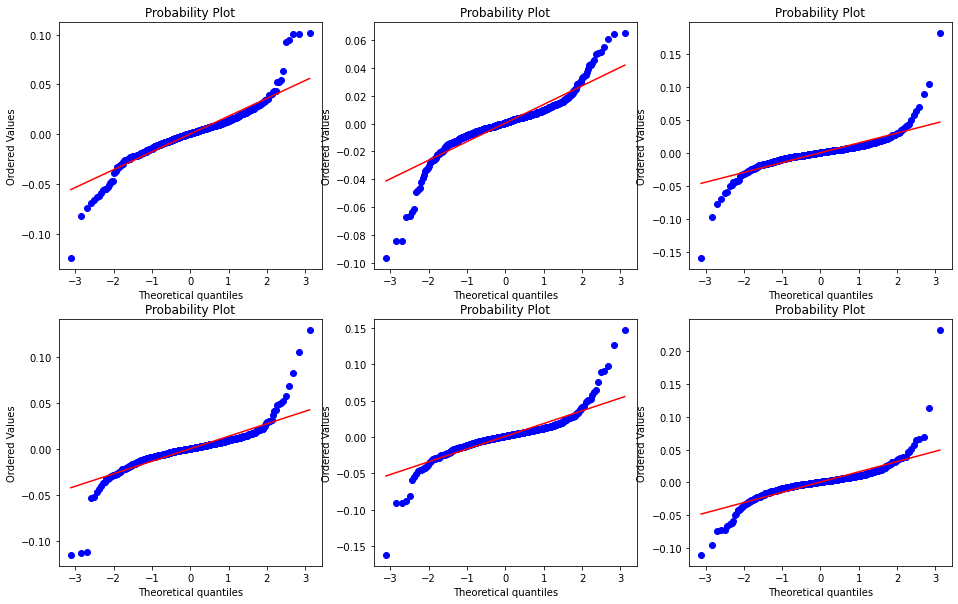

In [21]:
f = plt.figure(figsize = (16,10))
for i in range(len(tickers)):
    ax = f.add_subplot('23{}'.format(i+1))
    stats.probplot(daily_pct_change.iloc[:,i], dist = "norm", plot = ax)
plt.show()

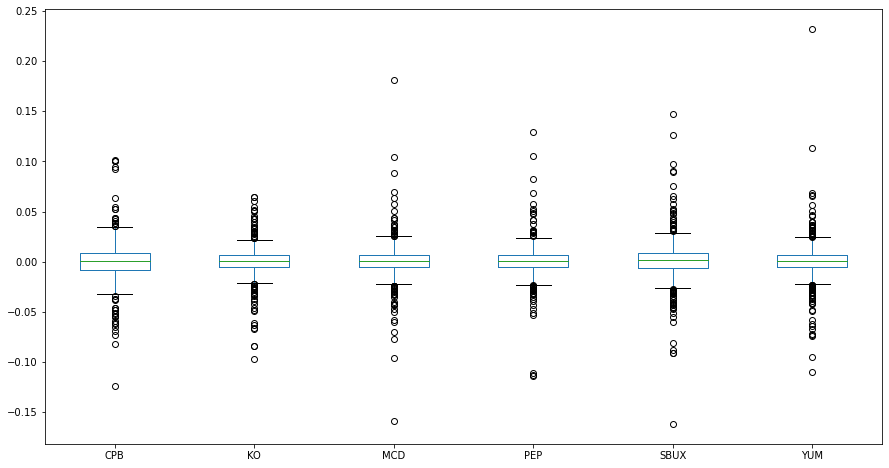

In [22]:
daily_pct_change.plot(kind = "box", figsize = (15, 8))